In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import glob

In [2]:
path = r'C:/Users/561640/Desktop/MAD/AST' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

print(len(frame))
frame.head()

10000


,drugName,effectiveTime,route,spl_product_data_elements,product_type,id
0,"SODIUM BORATE, ANAMIRTA COCCULUS SEED, GELSEMI...",20140814,ORAL,"TRIP EASE SODIUM BORATE, ANAMIRTA COCCULUS SEE...",HUMAN OTC DRUG,977f1de9-3567-4053-ac35-eeb15012f936
1,NaN,20170126,NaN,Levonorgestrel Next Choice One Dose LEVONORGES...,NaN,c0543309-9868-45a3-bcf8-6e4275dec4da
2,SALICYLIC ACID,20180406,TOPICAL,28.5% Salicylic Acid salicylic acid salicylic ...,HUMAN PRESCRIPTION DRUG,fb43c2d8-731b-437c-ba5c-82e7b8dbe712
3,BENZALKONIUM CHLORIDE,20181023,TOPICAL,Sani Professional Brand Sani-Hands for KidsHan...,HUMAN OTC DRUG,78ea880c-5eb8-e101-e053-2991aa0ab7a2
4,"OCTINOXATE, OCTISALATE, TITANIUM DIOXIDE, AND ...",20150630,NaN,Too Cool For SchoolDINO PLATZ CINEMA CITY (CC ...,HUMAN OTC DRUG,cbb0f401-ee2f-45fe-81dd-f252a17922eb


In [3]:
from datetime import datetime
def extractTimeStamp(time):
    #print(time)
    #print(int(str(time)[:4]),(str(time)[4:6]),(str(time)[6:8]))
    year = datetime(int(str(time)[:4]),int(str(time)[4:6]),int(str(time)[6:8]))
    return year

def extractYear(time):
    #print(time)
    #print(int(str(time)[:4]),(str(time)[4:6]),(str(time)[6:8]))
    
    return time.year

In [4]:
frame['timeStamp'] = frame['effectiveTime'].apply(extractTimeStamp)
frame.head()
frame['year'] =  frame['timeStamp'].apply(extractYear)
frame.head()

,drugName,effectiveTime,route,spl_product_data_elements,product_type,id,timeStamp,year
0,"SODIUM BORATE, ANAMIRTA COCCULUS SEED, GELSEMI...",20140814,ORAL,"TRIP EASE SODIUM BORATE, ANAMIRTA COCCULUS SEE...",HUMAN OTC DRUG,977f1de9-3567-4053-ac35-eeb15012f936,2014-08-14,2014
1,NaN,20170126,NaN,Levonorgestrel Next Choice One Dose LEVONORGES...,NaN,c0543309-9868-45a3-bcf8-6e4275dec4da,2017-01-26,2017
2,SALICYLIC ACID,20180406,TOPICAL,28.5% Salicylic Acid salicylic acid salicylic ...,HUMAN PRESCRIPTION DRUG,fb43c2d8-731b-437c-ba5c-82e7b8dbe712,2018-04-06,2018
3,BENZALKONIUM CHLORIDE,20181023,TOPICAL,Sani Professional Brand Sani-Hands for KidsHan...,HUMAN OTC DRUG,78ea880c-5eb8-e101-e053-2991aa0ab7a2,2018-10-23,2018
4,"OCTINOXATE, OCTISALATE, TITANIUM DIOXIDE, AND ...",20150630,NaN,Too Cool For SchoolDINO PLATZ CINEMA CITY (CC ...,HUMAN OTC DRUG,cbb0f401-ee2f-45fe-81dd-f252a17922eb,2015-06-30,2015


In [5]:
def getListOfIng(text):
    No_of_ing = 0
    if(text!=""):
        listOfIng = text.split(",")
        No_of_ing =  len(listOfIng)
        return No_of_ing
    else:
        return No_of_ing

In [6]:
frame = frame.loc[frame['timeStamp'] >='2011-01-01']

In [7]:
frame['number_of_ingredients'] = frame['spl_product_data_elements'].apply(getListOfIng)
frame.head()

,drugName,effectiveTime,route,spl_product_data_elements,product_type,id,timeStamp,year,number_of_ingredients
0,"SODIUM BORATE, ANAMIRTA COCCULUS SEED, GELSEMI...",20140814,ORAL,"TRIP EASE SODIUM BORATE, ANAMIRTA COCCULUS SEE...",HUMAN OTC DRUG,977f1de9-3567-4053-ac35-eeb15012f936,2014-08-14,2014,6
1,NaN,20170126,NaN,Levonorgestrel Next Choice One Dose LEVONORGES...,NaN,c0543309-9868-45a3-bcf8-6e4275dec4da,2017-01-26,2017,2
2,SALICYLIC ACID,20180406,TOPICAL,28.5% Salicylic Acid salicylic acid salicylic ...,HUMAN PRESCRIPTION DRUG,fb43c2d8-731b-437c-ba5c-82e7b8dbe712,2018-04-06,2018,1
3,BENZALKONIUM CHLORIDE,20181023,TOPICAL,Sani Professional Brand Sani-Hands for KidsHan...,HUMAN OTC DRUG,78ea880c-5eb8-e101-e053-2991aa0ab7a2,2018-10-23,2018,1
4,"OCTINOXATE, OCTISALATE, TITANIUM DIOXIDE, AND ...",20150630,NaN,Too Cool For SchoolDINO PLATZ CINEMA CITY (CC ...,HUMAN OTC DRUG,cbb0f401-ee2f-45fe-81dd-f252a17922eb,2015-06-30,2015,7


In [8]:
frame.dropna()
frame.head()

,drugName,effectiveTime,route,spl_product_data_elements,product_type,id,timeStamp,year,number_of_ingredients
0,"SODIUM BORATE, ANAMIRTA COCCULUS SEED, GELSEMI...",20140814,ORAL,"TRIP EASE SODIUM BORATE, ANAMIRTA COCCULUS SEE...",HUMAN OTC DRUG,977f1de9-3567-4053-ac35-eeb15012f936,2014-08-14,2014,6
1,NaN,20170126,NaN,Levonorgestrel Next Choice One Dose LEVONORGES...,NaN,c0543309-9868-45a3-bcf8-6e4275dec4da,2017-01-26,2017,2
2,SALICYLIC ACID,20180406,TOPICAL,28.5% Salicylic Acid salicylic acid salicylic ...,HUMAN PRESCRIPTION DRUG,fb43c2d8-731b-437c-ba5c-82e7b8dbe712,2018-04-06,2018,1
3,BENZALKONIUM CHLORIDE,20181023,TOPICAL,Sani Professional Brand Sani-Hands for KidsHan...,HUMAN OTC DRUG,78ea880c-5eb8-e101-e053-2991aa0ab7a2,2018-10-23,2018,1
4,"OCTINOXATE, OCTISALATE, TITANIUM DIOXIDE, AND ...",20150630,NaN,Too Cool For SchoolDINO PLATZ CINEMA CITY (CC ...,HUMAN OTC DRUG,cbb0f401-ee2f-45fe-81dd-f252a17922eb,2015-06-30,2015,7


In [9]:
df=frame.groupby(['timeStamp','drugName'])['number_of_ingredients'].mean().reset_index(name="avg_no_of_ingredients")
#print(df.head())
#df_new = df.groupby(['timeStamp'])['avg_no_of_ingredients'].sum().reset_index(name="count")
#df_new.head()
df_new = df
df_new.head()

,timeStamp,drugName,avg_no_of_ingredients
0,2011-01-01,EUPATORIUM PERFOLIATUM FLOWERING TOP,1.0
1,2011-01-03,ALBUTEROL SULFATE,1.0
2,2011-01-03,BELLADONNA ALKALOIDS WITH PHENOBARTBITAL,3.0
3,2011-01-03,MOMETASONE FUROATE,1.0
4,2011-01-03,NAPROXEN SODIUM,1.0


In [10]:
df_new = df_new.set_index('timeStamp')
df_new.index

DatetimeIndex(['2011-01-01', '2011-01-03', '2011-01-03', '2011-01-03',
               '2011-01-03', '2011-01-04', '2011-01-04', '2011-01-04',
               '2011-01-10', '2011-01-10',
               ...
               '2019-06-27', '2019-06-27', '2019-06-27', '2019-06-28',
               '2019-06-28', '2019-06-28', '2019-06-28', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', name='timeStamp', length=6800, freq=None)

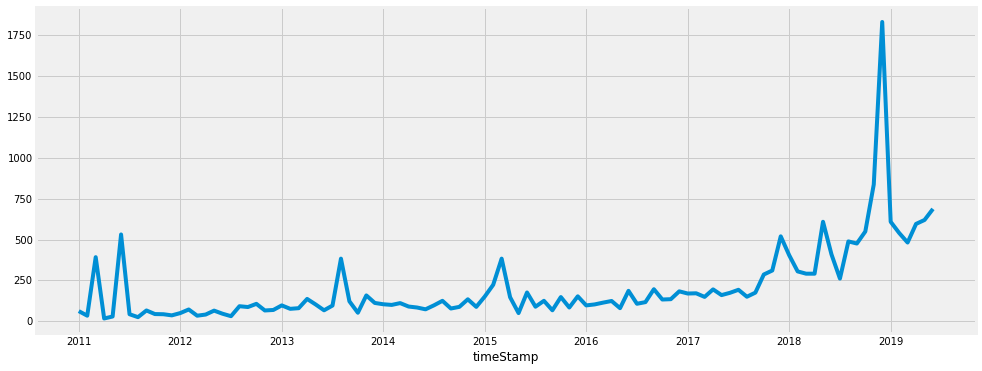

In [11]:
y = df_new['avg_no_of_ingredients'].resample('MS').sum()
y.plot(figsize=(15, 6))
plt.show()

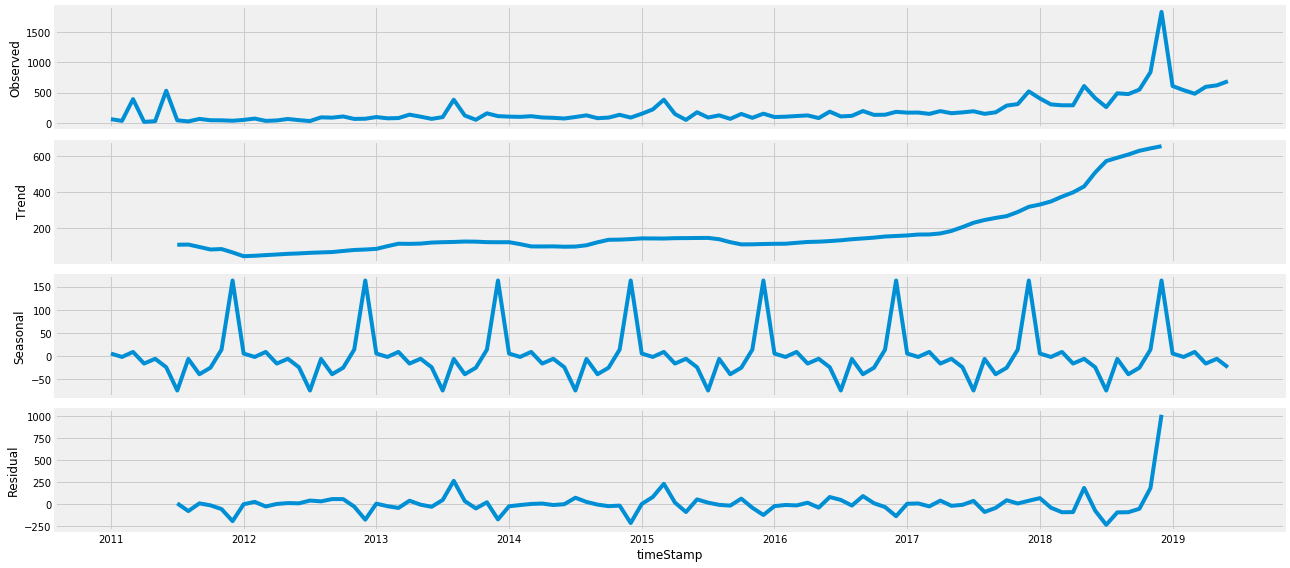

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [17]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7903      0.051    -15.641      0.000      -0.889      -0.691
sigma2      2.783e+04   1934.149     14.388      0.000     2.4e+04    3.16e+04


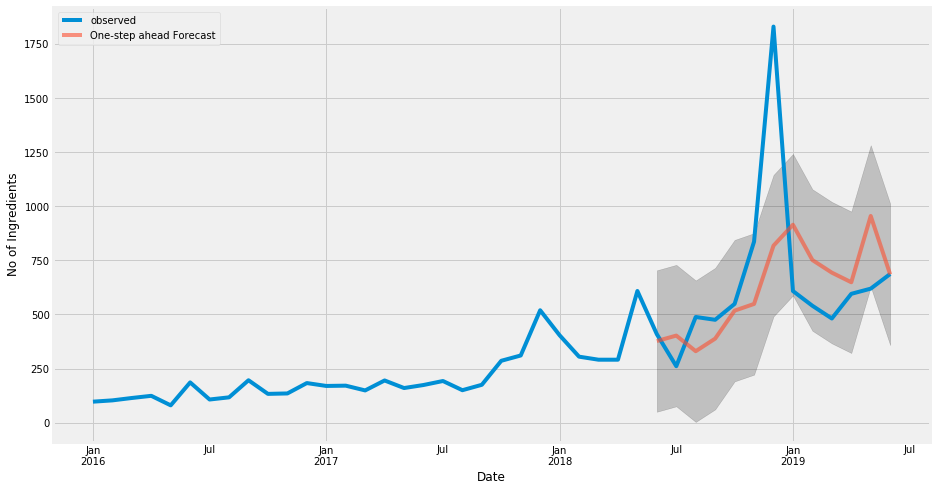

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.6, figsize=(14, 8))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('No of Ingredients')
plt.legend()
plt.show()

In [53]:
y_forecasted = pred.predicted_mean
y_forecasted.to_csv(path+"/solutions/forecastPrediction.csv")
print("Predictions:")
print(y_forecasted.head())
print("")
print("True Value:")
y["2018-06":][:5]

Predictions:
timeStamp
2018-06-01    377.288665
2018-07-01    402.437899
2018-08-01    330.281195
2018-09-01    388.456520
2018-10-01    517.707800
Freq: MS, dtype: float64

True Value:


timeStamp
2018-06-01    409.0
2018-07-01    261.0
2018-08-01    488.5
2018-09-01    475.5
2018-10-01    549.0
Freq: MS, Name: avg_no_of_ingredients, dtype: float64

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 112498.77
The Root Mean Squared Error of our forecasts is 335.41


In [48]:
groupedFrame = frame.groupby(['year','drugName'])['number_of_ingredients'].mean().reset_index(name="avg_no_of_ingredients")
groupedFrame.to_csv(path+"/solutions/result1.csv")
groupedFrame.head()

,year,drugName,avg_no_of_ingredients
0,2011,"ABIES NIG., AESCULUS HIPP., ALOE, ALUMINA, BRY...",30.0
1,2011,"ABIES NIGRA, ACONITUM NAPELLUS, ARSENICUM IODA...",12.0
2,2011,"ABSINTHIUM, ACONITUM NAP., ANTIMON. TART., BEL...",29.0
3,2011,ACETAMINOPHEN,2.0
4,2011,ACETAMINOPHEN AND CODEINE PHOSPHATE,3.0


In [52]:
groupedFrame_1 = frame.groupby(['year','route'])['number_of_ingredients'].mean().reset_index(name="avg_no_of_ingredients")
groupedFrame_1.to_csv(path+"/solutions/result2.csv")
groupedFrame_1.head()

,year,route,avg_no_of_ingredients
0,2011,CUTANEOUS,1.250000
1,2011,DENTAL,1.166667
2,2011,INTRAMUSCULAR,1.000000
3,2011,INTRAVENOUS,1.000000
4,2011,NASAL,1.500000


In [47]:
common_interactions = frame.groupby(['drugName'])['year'].apply(set).reset_index()
common_interactions['count'] = common_interactions['year'].apply(lambda x: len(set(x)))
common_interactions.sort_values('count',ascending=False).head()

,drugName,year,count
995,CHLOROXYLENOL,"{2016, 2017, 2018, 2019, 2011, 2012, 2013, 201...",9
2425,SALICYLIC ACID,"{2016, 2017, 2018, 2019, 2011, 2012, 2013, 201...",9
2610,TITANIUM DIOXIDE,"{2016, 2017, 2018, 2019, 2011, 2012, 2013, 201...",9
260,ALUMINUM ZIRCONIUM TETRACHLOROHYDREX GLY,"{2016, 2017, 2018, 2019, 2011, 2012, 2013, 201...",9
2650,TRICLOSAN,"{2016, 2017, 2018, 2019, 2011, 2012, 2013, 201...",9
